In [1]:
import numpy as np
import sklearn.metrics as met
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error




plt.style.use('ggplot')


In [4]:
Data = pd.read_csv(r'.\cardata.csv')
Data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
Data.shape

(301, 9)

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
Data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

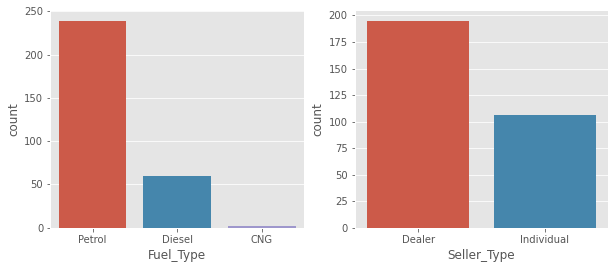

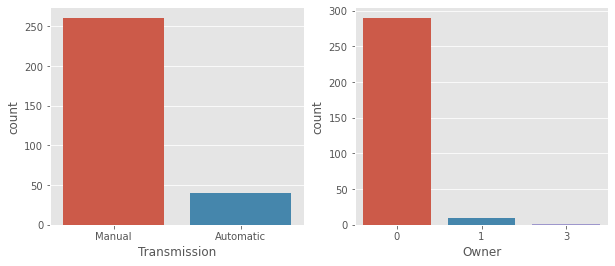

In [8]:
categorical = ['Fuel_Type','Seller_Type','Transmission','Owner']
i = 0
while i<4:
    fig = plt.figure(figsize=[10,4])
    plt.subplot(1,2,1)
    sns.countplot(x=categorical[i], data=Data)
    i += 1
    plt.subplot(1,2,2)
    sns.countplot(x=categorical[i], data=Data)
    i += 1
    plt.show()

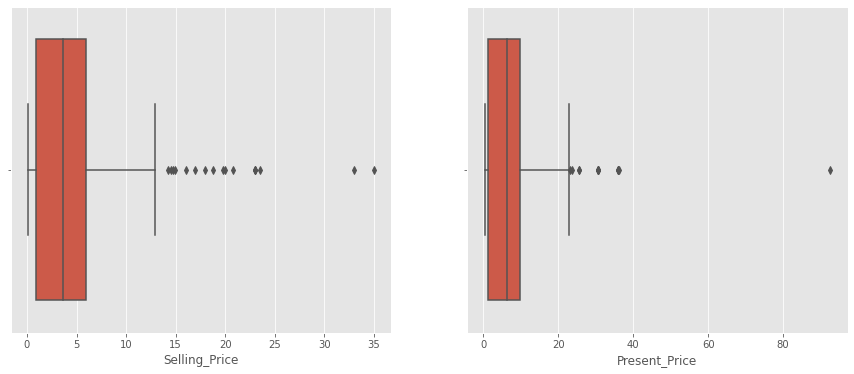

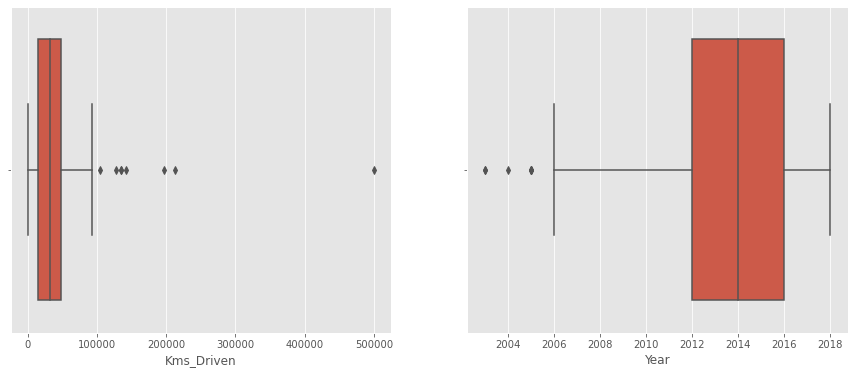

In [9]:
numerical = ['Selling_Price','Present_Price','Kms_Driven','Year']
i = 0
while i<4:
    fig = plt.figure(figsize=[15,6])
    plt.subplot(1,2,1)
    sns.boxplot(x=numerical[i], data=Data)
    i += 1
    plt.subplot(1,2,2)
    sns.boxplot(x=numerical[i], data=Data)
    i += 1
    plt.show()

In [10]:
Data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [11]:
Data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [12]:
print(pd.unique(Data['Fuel_Type']))
print(pd.unique(Data['Seller_Type']))
print(pd.unique(Data['Transmission']))
print(pd.unique(Data['Owner']))

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [13]:
Data.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [14]:
Data.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [15]:
Data.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [16]:
#Data.Fuel_Type=Data.Fuel_Type.apply(['Petrol','Diesel','CNG'].index)

In [17]:
#Data.Seller_Type = Data.Seller_Type.apply(['Dealer','Individual'].index)

In [18]:
#Data.Transmission = Data.Transmission.apply(['Manual','Automatic'].index)

In [19]:
Data['Fuel_Type'].replace({'Petrol':2,'Diesel':3,'CNG':4},inplace=True)
Data['Seller_Type'].replace({'Dealer':2,'Individual':3},inplace=True)
Data['Transmission'].replace({'Manual':2,'Automatic':3},inplace=True)
Data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,2,2,0
1,sx4,2013,4.75,9.54,43000,3,2,2,0
2,ciaz,2017,7.25,9.85,6900,2,2,2,0
3,wagon r,2011,2.85,4.15,5200,2,2,2,0
4,swift,2014,4.60,6.87,42450,3,2,2,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,3,2,2,0
297,brio,2015,4.00,5.90,60000,2,2,2,0
298,city,2009,3.35,11.00,87934,2,2,2,0
299,city,2017,11.50,12.50,9000,3,2,2,0


In [20]:
Data.drop('Car_Name',axis=1,inplace=True)

In [21]:
Age_car = []
for i in Data['Year']:
   Age_car.append(2019-i)


In [22]:
Data['Age_car']=Age_car
Data

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_car
0,2014,3.35,5.59,27000,2,2,2,0,5
1,2013,4.75,9.54,43000,3,2,2,0,6
2,2017,7.25,9.85,6900,2,2,2,0,2
3,2011,2.85,4.15,5200,2,2,2,0,8
4,2014,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,3,2,2,0,3
297,2015,4.00,5.90,60000,2,2,2,0,4
298,2009,3.35,11.00,87934,2,2,2,0,10
299,2017,11.50,12.50,9000,3,2,2,0,2


In [23]:
Data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_car
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,2.212625,2.352159,2.132890,0.043189,5.372093
std,2.891554,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915,2.891554
min,2003.000000,0.100000,0.320000,500.000000,2.000000,2.000000,2.000000,0.000000,1.000000
25%,2012.000000,0.900000,1.200000,15000.000000,2.000000,2.000000,2.000000,0.000000,3.000000
50%,2014.000000,3.600000,6.400000,32000.000000,2.000000,2.000000,2.000000,0.000000,5.000000
75%,2016.000000,6.000000,9.900000,48767.000000,2.000000,3.000000,2.000000,0.000000,7.000000
max,2018.000000,35.000000,92.600000,500000.000000,4.000000,3.000000,3.000000,3.000000,16.000000


In [24]:
Data.Fuel_Type.describe()

count    301.000000
mean       2.212625
std        0.425801
min        2.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: Fuel_Type, dtype: float64

In [25]:
Data.Fuel_Type.value_counts()

2    239
3     60
4      2
Name: Fuel_Type, dtype: int64

In [26]:
Data.Seller_Type.value_counts()

2    195
3    106
Name: Seller_Type, dtype: int64

In [27]:
Data.Transmission.value_counts()

2    261
3     40
Name: Transmission, dtype: int64

In [28]:
df = pd.DataFrame(Data)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_car
0,2014,3.35,5.59,27000,2,2,2,0,5
1,2013,4.75,9.54,43000,3,2,2,0,6
2,2017,7.25,9.85,6900,2,2,2,0,2
3,2011,2.85,4.15,5200,2,2,2,0,8
4,2014,4.60,6.87,42450,3,2,2,0,5


In [29]:
X = df.loc[:,(Data.columns != 'Selling_Price')]
Y = Data['Selling_Price'].values.reshape(-1,1)

In [30]:
Y.shape

(301, 1)

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)
X_train.shape

(240, 8)

In [32]:
X_test.shape

(61, 8)

In [33]:
Y_train.shape

(240, 1)

In [34]:
Y_test.shape

(61, 1)

In [35]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [36]:
#Training with All Features 
model = LinearRegression()

In [37]:
model.fit(X_train , Y_train)

LinearRegression()

In [38]:
Y_pred = model.predict(X_test)

In [39]:
print('Mean Absolute Error : ',metrics.mean_absolute_error(Y_test,Y_pred))
print('Mean Squared Error : ',metrics.mean_squared_error(Y_test,Y_pred))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
print('R2 Score',metrics.r2_score(Y_test,Y_pred))


Mean Absolute Error :  1.1530045916161973
Mean Squared Error :  3.287646085716506
Root Mean Squared Error 1.813186721139471
R2 Score 0.8484549412090071


In [40]:
#Training Present_Price, Transmission, Kms_Driven, Fuel_Type,Year
columns = ['Present_Price', 'Transmission', 'Kms_Driven', 'Fuel_Type','Year']
model = LinearRegression()
model.fit(X_train[columns], Y_train)

LinearRegression()

In [41]:
Y_pred = model.predict(X_test[columns])

In [42]:
print('Mean Absolute Error : ',metrics.mean_absolute_error(Y_test,Y_pred))
print('Mean Squared Error : ',metrics.mean_squared_error(Y_test,Y_pred))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
print('R2 Score',metrics.r2_score(Y_test,Y_pred))


Mean Absolute Error :  1.1588826185222638
Mean Squared Error :  3.208498138604343
Root Mean Squared Error 1.7912281090370212
R2 Score 0.8521032902056982


In [43]:
#Training Present_Price,,Year,Fuel_Type,Seller_Type,Kms_Driven
columns = ['Present_Price','Seller_Type','Year','Fuel_Type','Kms_Driven']
model = LinearRegression()
model.fit(X_train[columns], Y_train)

LinearRegression()

In [44]:
Y_pred = model.predict(X_test[columns])

In [45]:
print('Mean Absolute Error : ',metrics.mean_absolute_error(Y_test,Y_pred))
print('Mean Squared Error : ',metrics.mean_squared_error(Y_test,Y_pred))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
print('R2 Score',metrics.r2_score(Y_test,Y_pred))


Mean Absolute Error :  1.0940506991689145
Mean Squared Error :  2.6542275181638155
Root Mean Squared Error 1.6291800140450459
R2 Score 0.8776525651491639


In [46]:
#Training Present_Price,,Age_car,Fuel_Type,Seller_Type,Kms_Driven
columns = ['Present_Price','Seller_Type','Age_car','Fuel_Type','Kms_Driven']
model = LinearRegression()
model.fit(X_train[columns], Y_train)

LinearRegression()

In [47]:
Y_pred = model.predict(X_test[columns])

In [48]:
print('Mean Absolute Error : ',metrics.mean_absolute_error(Y_test,Y_pred))
print('Mean Squared Error : ',metrics.mean_squared_error(Y_test,Y_pred))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
print('R2 Score',metrics.r2_score(Y_test,Y_pred))


Mean Absolute Error :  1.0940506991689438
Mean Squared Error :  2.6542275181638733
Root Mean Squared Error 1.6291800140450634
R2 Score 0.8776525651491612


In [49]:
k_fold = KFold(10)
print(cross_val_score(model, X, Y.ravel(), cv=k_fold, n_jobs=1))

[ 6.63522141e-01  8.80842763e-01  7.23708463e-01  8.63126108e-01
 -4.36488306e+01 -1.07944231e+03 -3.50129071e-01  7.84378582e-01
  8.27975783e-01  8.74089252e-01]


In [50]:
Data

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_car
0,2014,3.35,5.59,27000,2,2,2,0,5
1,2013,4.75,9.54,43000,3,2,2,0,6
2,2017,7.25,9.85,6900,2,2,2,0,2
3,2011,2.85,4.15,5200,2,2,2,0,8
4,2014,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,3,2,2,0,3
297,2015,4.00,5.90,60000,2,2,2,0,4
298,2009,3.35,11.00,87934,2,2,2,0,10
299,2017,11.50,12.50,9000,3,2,2,0,2


In [51]:
len(Data)/10

30.1

In [52]:
Data1 = Data[Data.index<120]
Data2 = Data[Data.index>210]
Data3 = Data1.append(Data2)
Data3.reset_index(drop=True,inplace=True)
Data3

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_car
0,2014,3.35,5.59,27000,2,2,2,0,5
1,2013,4.75,9.54,43000,3,2,2,0,6
2,2017,7.25,9.85,6900,2,2,2,0,2
3,2011,2.85,4.15,5200,2,2,2,0,8
4,2014,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...
205,2016,9.50,11.60,33988,3,2,2,0,3
206,2015,4.00,5.90,60000,2,2,2,0,4
207,2009,3.35,11.00,87934,2,2,2,0,10
208,2017,11.50,12.50,9000,3,2,2,0,2


In [53]:
Data3.drop('Year',axis=1,inplace=True)
Data3

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_car
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
205,9.50,11.60,33988,3,2,2,0,3
206,4.00,5.90,60000,2,2,2,0,4
207,3.35,11.00,87934,2,2,2,0,10
208,11.50,12.50,9000,3,2,2,0,2


In [54]:
X2 = Data3.drop('Selling_Price', axis=1)
Y2 = Data3['Selling_Price'].values.reshape(-1,1)
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=1)
model2 = LinearRegression()
model2.fit(x_train2, y_train2)

LinearRegression()

In [55]:
x_test2.shape

(42, 7)

In [56]:
y_pred2 = model2.predict(x_test2)

In [57]:
print('Mean Absolute Error : ',metrics.mean_absolute_error(y_test2,y_pred2))
print('Mean Squared Error : ',metrics.mean_squared_error(y_test2,y_pred2))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test2,y_pred2)))
print('R2 Score',metrics.r2_score(y_test2,y_pred2))

Mean Absolute Error :  1.2344068697754265
Mean Squared Error :  2.6238982580770474
Root Mean Squared Error 1.6198451339794948
R2 Score 0.8793462370194999


In [58]:
print(model2.intercept_)
print('--------')
print(model2.coef_)

[-1.69623504]
--------
[[ 4.42320455e-01 -2.66901271e-05  2.25919515e+00 -1.26225774e+00
   2.10515821e+00 -1.13003710e+00 -4.62552614e-01]]


In [59]:
y_pred2 = model2.predict([[11.23,42000,1,4,6,1,10]])
y_pred2

array([[6.23558857]])

In [60]:
df1 = pd.DataFrame(Data)
df1

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_car
0,2014,3.35,5.59,27000,2,2,2,0,5
1,2013,4.75,9.54,43000,3,2,2,0,6
2,2017,7.25,9.85,6900,2,2,2,0,2
3,2011,2.85,4.15,5200,2,2,2,0,8
4,2014,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,3,2,2,0,3
297,2015,4.00,5.90,60000,2,2,2,0,4
298,2009,3.35,11.00,87934,2,2,2,0,10
299,2017,11.50,12.50,9000,3,2,2,0,2


In [61]:
X3 = df1.drop(['Year','Selling_Price'], axis=1)
Y3 = Data['Selling_Price'].values.reshape(-1,1)

In [62]:
X3

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_car
0,5.59,27000,2,2,2,0,5
1,9.54,43000,3,2,2,0,6
2,9.85,6900,2,2,2,0,2
3,4.15,5200,2,2,2,0,8
4,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...
296,11.60,33988,3,2,2,0,3
297,5.90,60000,2,2,2,0,4
298,11.00,87934,2,2,2,0,10
299,12.50,9000,3,2,2,0,2


In [63]:
Y3.shape

(301, 1)

In [64]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.2, random_state=1)
model3 = LinearRegression()
model3.fit(x_train3, y_train3)
y_pred3 = model3.predict(x_test3)

In [65]:
x_test3.shape

(61, 7)

In [66]:
print('Mean Absolute Error : ',metrics.mean_absolute_error(y_test3,y_pred3))
print('Mean Squared Error : ',metrics.mean_squared_error(y_test3,y_pred3))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test3,y_pred3)))
print('R2 Score',metrics.r2_score(y_test3,y_pred3))

Mean Absolute Error :  1.153004591615891
Mean Squared Error :  3.287646085715836
Root Mean Squared Error 1.8131867211392863
R2 Score 0.848454941209038
